In [113]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
day_dict={}
for filepath in glob.iglob('week13_data/KRAKEN/SRR*.kraken'):
    name=filepath[26:28]
    frequency_dict={}
    taxonomy=open(filepath)
    for line in taxonomy:
        full_tax=line.split(';')
        try:
            species=full_tax[-3]
            frequency_dict.setdefault(species,0)
            frequency_dict[species]+=1
        except IndexError:
            pass
    day_dict[name]=frequency_dict
    taxonomy.close()


In [115]:
day_df=pd.DataFrame(day_dict)
day_df

,93,83,89,97,90,86,94,88
Enterococcaceae,950537.0,772811.0,1077359.0,686562.0,954839.0,1100019.0,822410.0,1057369.0
Enterococcus,306463.0,255090.0,353151.0,264741.0,318185.0,380634.0,264684.0,379945.0
Cutibacterium,46300.0,277677.0,29.0,435897.0,185.0,64.0,47332.0,153.0
Staphylococcaceae,228205.0,216202.0,108419.0,114842.0,169401.0,83963.0,294659.0,119905.0
Staphylococcus,69042.0,67867.0,35465.0,27283.0,52358.0,28460.0,53416.0,40320.0
...,...,...,...,...,...,...,...,...
SRR492188.996184\troot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
SRR492188.996443\troot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
SRR492188.998692\troot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
SRR492188.1006232\troot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [116]:
day_nonan=day_df.dropna()
normalized_day=day_nonan.div(day_nonan.sum(axis=0),axis=1)
normalized_day = normalized_day[["83","86","88","89","90","93","94","97"]]
normalized_day.columns=['Day 0','Day 1','Day 2','Day 3', 'Day 4','Day 5','Day 6','Day 7']

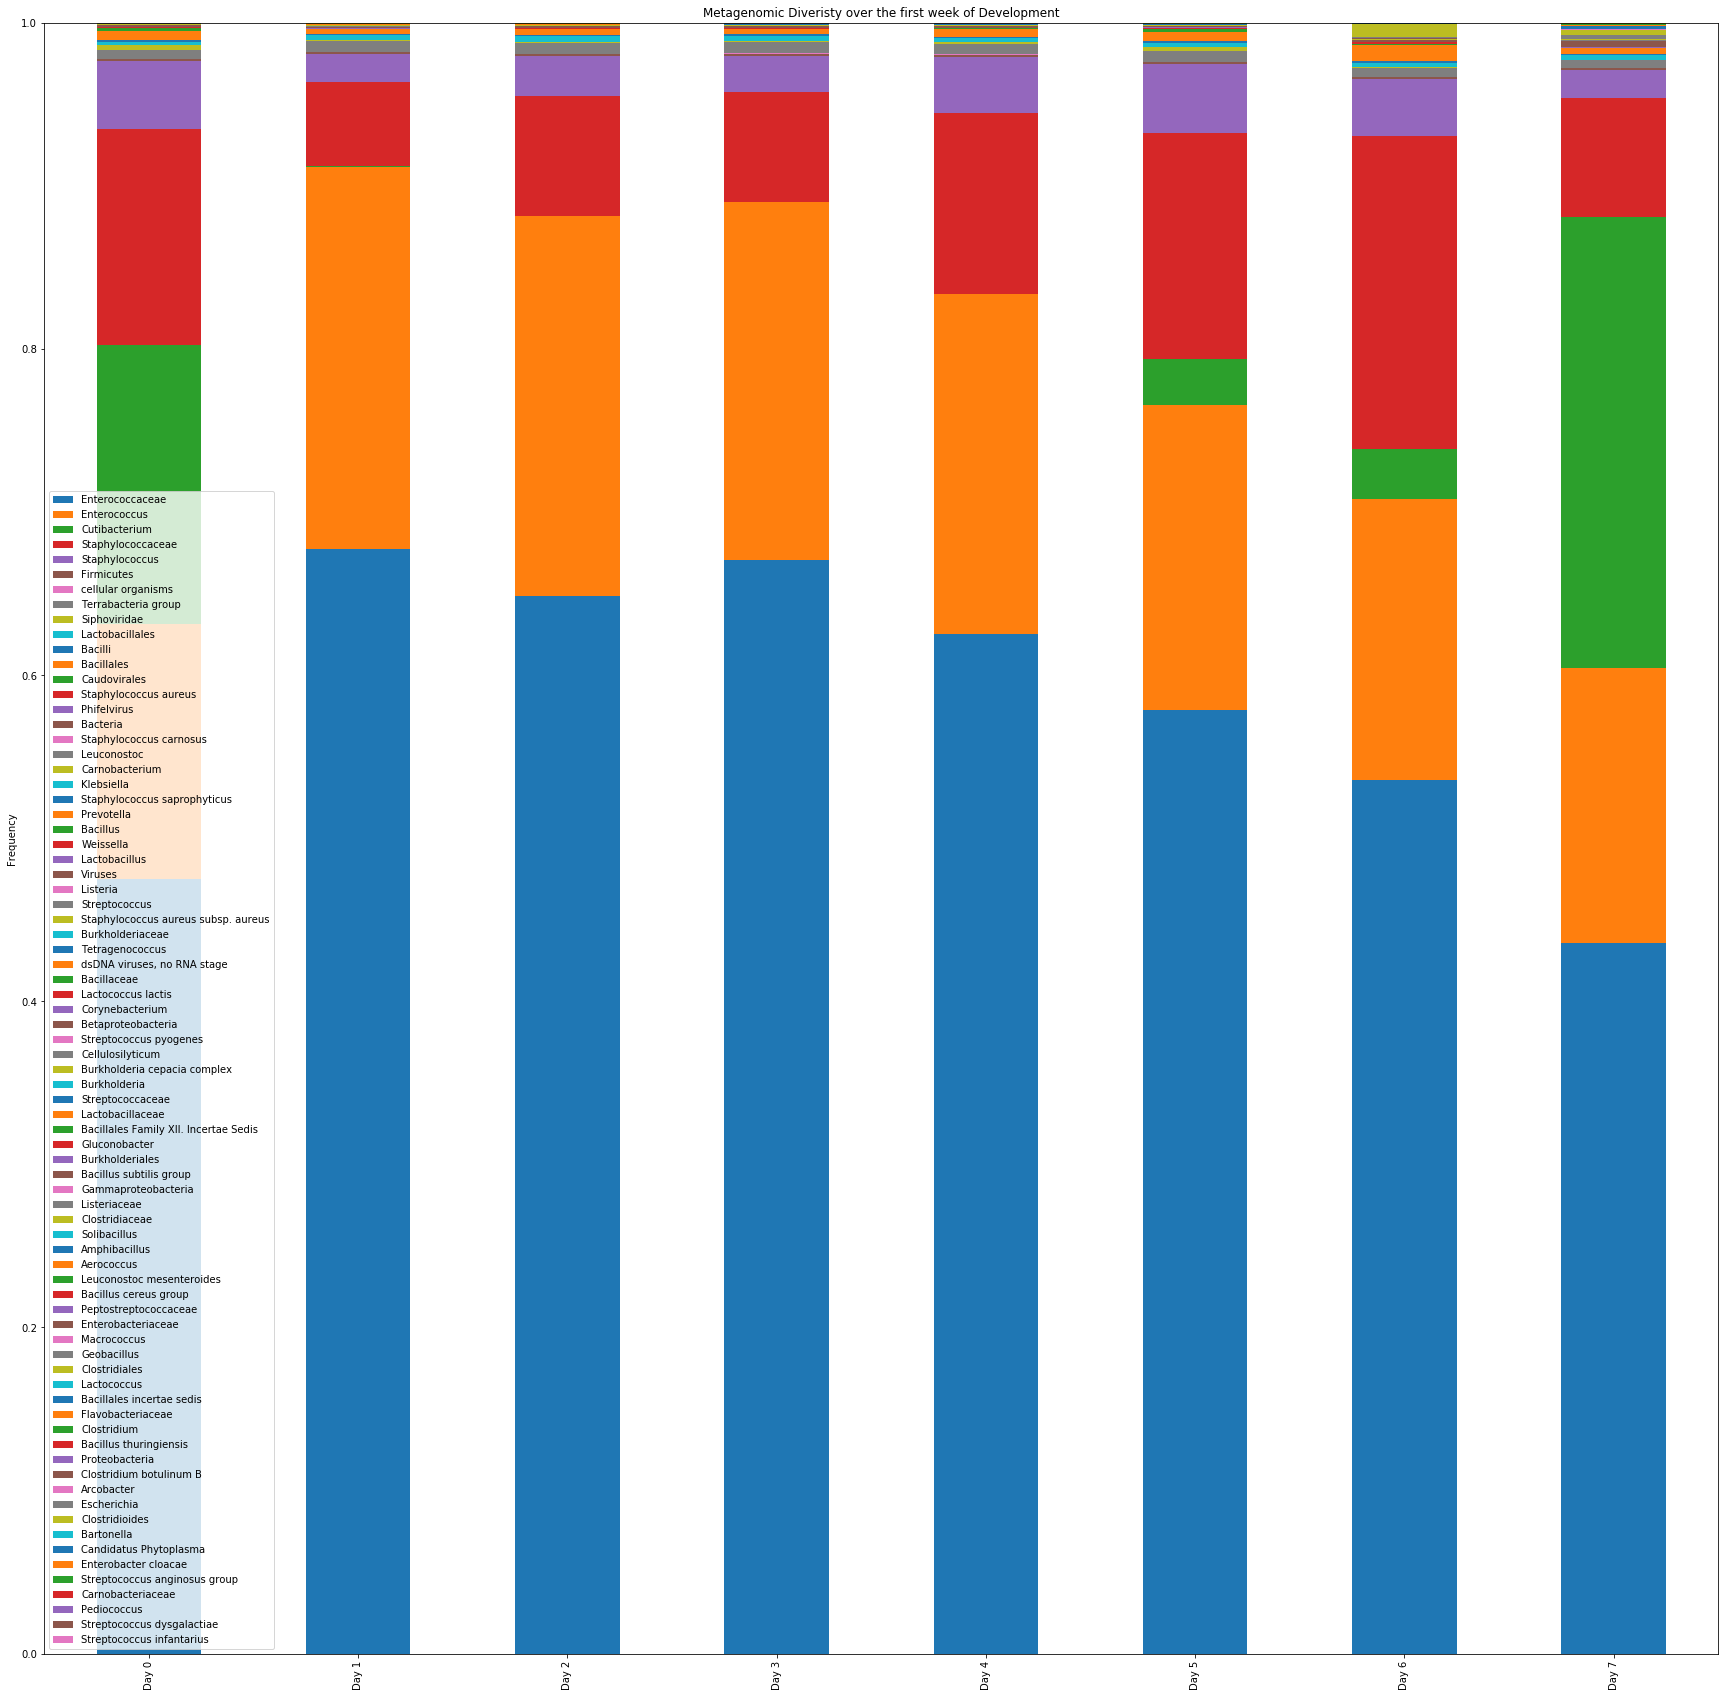

In [117]:
ax=normalized_day.transpose().plot.bar(stacked=True,figsize=(30,30))
plt.legend(loc='lower left')
ax.set_ylabel("Frequency")
ax.set_title("Metagenomic Diveristy over the first week of Development")
plt.show()

#Question 1:
#increasing diversity and decreasing amount of enterococcaceae throuhgout the first week of development.
#However, first day seems to be somewhat of an exception for whatever reason, not sure what happened to the large fraction of 
#cultibacterium

# Answer to Question 2:  What metrics in the contigs can we use to group them together?

In short alignment. But specific regions of the genome may be more or less information than others. 
For example, 16sRNA reads maybe be more informative for more fine-grained groupings. The alignment
metrics could be something like hamming distance between sequences. Secondary factors such as GC composition might also be informative



# Question 3: 

A). Looks like we have six bins
B). Added up all the file sizes to get about 13.1 mb. Assembly is 38.9 Mb 13.1/38.9=0.35
This means the bins cover about 35% 
C). Looks like the bins are about 0.5 Mb. This seems reasonable, as bacterial genomes are about 0.5-10 mB, 
so with the winnowing of coverage due to noise, this seems like a reasonable number
D). Global alignment with BLAST databases (although this might be too long). Could also use the LAST tool http://last.cbrc.jp, which does direct genome alignment.   


# Part 4

The Species identities are in a file called "bin_identities.txt". They are in numerical order. 

In [161]:
abundance_chart=pd.read_csv("abundance_table.tab",delimiter='\t')

abundance_chart = abundance_chart[["Genomic bins","SRR492183","SRR492185",
"SRR492186","SRR492188","SRR492190","SRR492193","SRR492194","SRR492197"]]
species_identities=["Staphylococcus haemolyticus","Enterococcus faecalis","Leuconostoc citreum",
                   "Cutibacterium avidum","Staphylococcus epidermidis","Staphylococcus aureus",
                   "Anaerococcus prevotii","Staphylococcus lugdunensis"]
abundance_chart["Genomic bins"]=species_identities
a=abundance_chart.set_index("Genomic bins")
a.columns=['Day 0','Day 1','Day 2','Day 3', 'Day 4','Day 5','Day 6','Day 7']
a

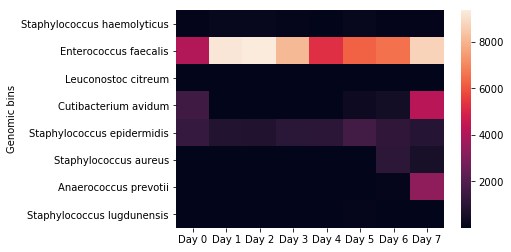

In [163]:
ax=sns.heatmap(a)

# Question 5 

The largest group in both of my analyses was enteroccocus/enteroccocae. The next most abundant group is staphylococcus, followed by Cutibacterium on the first and last days (we were intially worried that we had messed up the order of the days when we noticed that pattern, but perhaps it was just because the first day is weird because it is largely composed of the mom's microbiome. However, after this, the two charts diverge. Anaerocccus (in Firmicutes) is low frequency strain, even on the last day as is the Lueconostoc citreum (Lactobaccali). However, both charts seems to agree on which groups are largely important. 

Note, I also had to crop the number of days included, as many of the days were only in the bin frequencies (we didn't have Kraken files for SRR492066 for example. 